<a href="https://colab.research.google.com/github/screid/Estadistica_Computacional_UGM/blob/main/Clase_9_Regresion_lineal_y_multiple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
%matplotlib inline

# Importo librerías de lectura y manipulación  de datos y un dataset de ejemplo
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np

# Importo librerías para separar los datos y hacer la regresión lineal
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Cargo librería para gráficos
import matplotlib.pyplot as plt

# 1. Regresión Lineal Simple

## 1.1. Cargar datos y entrenar modelo

In [4]:
# Cargar los datos
data = load_diabetes(as_frame=True)
df = data.frame
X = df[['bmi']]
y = df['target']

df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [5]:
# Separo los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Creo el objeto de modelo, que va a ser una regresión lineal
modelo = LinearRegression()

# Entreno el modelo
modelo.fit(X_train, y_train)

LinearRegression()

In [8]:
# Generar datos aleatorios de BMI dentro del rango observado
bmi_min, bmi_max = X['bmi'].min(), X['bmi'].max()
bmi_random = np.random.uniform(bmi_min, bmi_max, size=10).reshape(-1, 1)

# Predecir usando el modelo entrenado
predicciones = modelo.predict(bmi_random)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [10]:
bmi_random

array([[-0.00335835],
       [-0.05345586],
       [ 0.15409616],
       [ 0.11588014],
       [ 0.05575198],
       [-0.01553711],
       [ 0.12004557],
       [ 0.10192809],
       [ 0.15765521],
       [ 0.04559937]])

In [11]:
predicciones

array([148.64977814,  98.62352911, 305.88034195, 267.71868088,
       207.67603281, 136.48834253, 271.87818133, 253.78647094,
       309.43433029, 197.53786668])

## 1.2. Generar gráficos

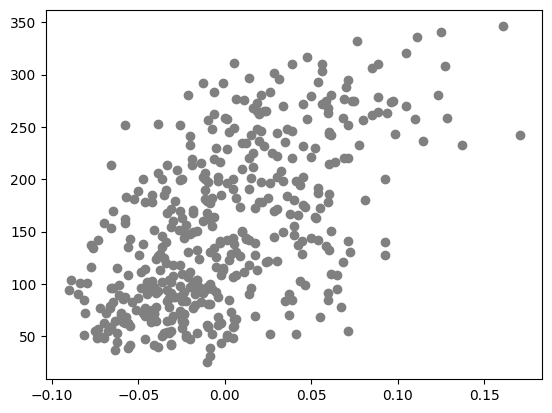

In [35]:
# Extraer BMI y declarar target
bmi = X['bmi'].values
target = y.values

# Gráfico de dispersión de datos originales
plt.scatter(bmi, target, color='gray', label='Datos originales')

# Predecimos sobre todo X
y_linea = modelo.predict(X)

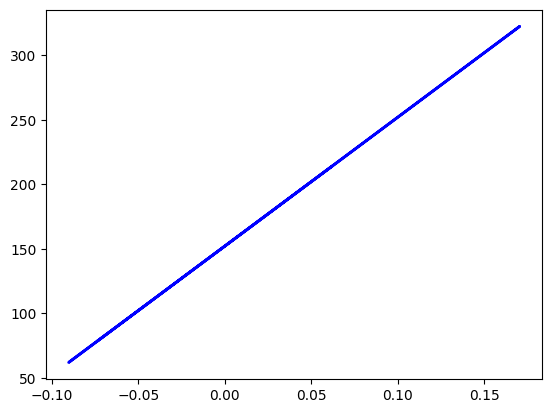

In [36]:
# Dibujar línea de regresión
plt.plot(bmi, y_linea, color='blue', linewidth=2, label='Línea de regresión')

In [32]:
# Coeficientes y métricas
pendiente = modelo.coef_[0]
intercepto = modelo.intercept_
r2 = modelo.score(X, y)

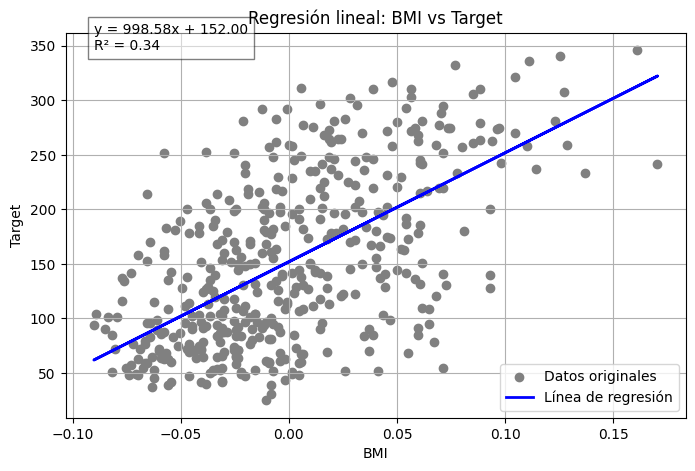

In [37]:
# Graficar
plt.figure(figsize=(8, 5))
plt.scatter(bmi, y, color='gray', label='Datos originales')
plt.plot(bmi, y_linea, color='blue', linewidth=2, label='Línea de regresión')

# Anotar
plt.text(x=bmi.min(), y=y.max(),
         s=f'y = {pendiente:.2f}x + {intercepto:.2f}\nR² = {r2:.2f}',
         fontsize=10, color='black', bbox=dict(facecolor='white', alpha=0.5))

plt.xlabel('BMI')
plt.ylabel('Target')
plt.title('Regresión lineal: BMI vs Target')
plt.legend()
plt.grid(True)
plt.show()

# 2. Regresión lineal múltiple

## 2.1. Cargar datos, separarlos y entrenar modelo

In [38]:
# Considero que ya tengo cargado df, puesto que lo cargué en la primera parte
# Elimino la variable target del conjunto X
X = df.drop(columns=['target'])

# Sólo dejo la columna target en el eje y
y = df['target']

# Sepato los datos (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Llamo al modelo de regresión lineal
modelo_multi = LinearRegression()

# Entreno el modelo
modelo_multi.fit(X_train, y_train)

LinearRegression()

In [39]:
# Genero datos aleatorios para luego predecirlos
# Obtener los rangos de cada variable (para muestrear valores realistas)
rangos = {col: (X[col].min(), X[col].max()) for col in X.columns}

# Generar 5 observaciones aleatorias
n_muestras = 5
datos_aleatorios = {
    col: np.random.uniform(low, high, n_muestras)
    for col, (low, high) in rangos.items()
}

# Convertir a DataFrame
X_random = pd.DataFrame(datos_aleatorios)

# Predecir
predicciones = modelo_multi.predict(X_random)

In [40]:
X_random.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,-0.083417,0.009991,0.105457,0.068341,-0.094604,0.122940,-0.061677,-0.015463,-0.063421,0.054637
1,0.063561,-0.035836,0.012781,-0.082521,-0.102913,-0.052112,0.011687,0.095623,-0.103041,-0.055031
2,-0.067387,-0.021960,0.035335,0.030325,0.138920,-0.007722,0.046576,-0.029412,0.118804,-0.104212
3,0.089389,0.030029,0.169272,-0.082433,0.107345,-0.095114,0.118334,0.118827,0.116957,0.002449
4,-0.089133,-0.017680,-0.016620,0.035446,-0.032704,-0.021442,0.146978,-0.026920,0.099252,-0.101394


## 2.2. Generar graficos

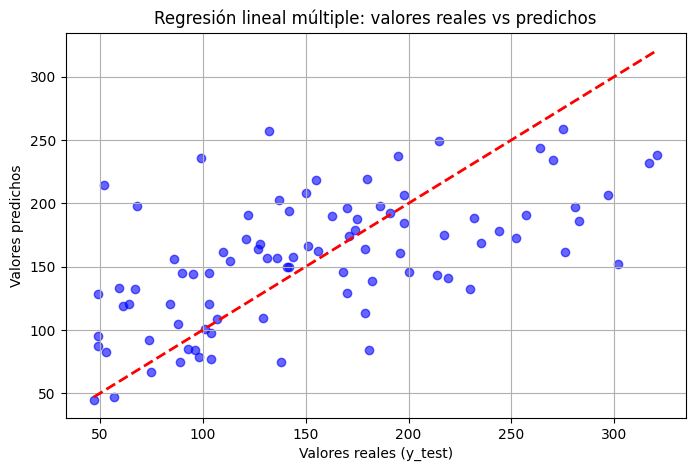

In [42]:
# Obtener predicciones del conjunto de prueba
y_pred = modelo_multi.predict(X_test)

# Gráfico de dispersión: valores reales vs predichos
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel('Valores reales (y_test)')
plt.ylabel('Valores predichos')
plt.title('Regresión lineal múltiple: valores reales vs predichos')
plt.grid(True)
plt.show()

# 3. Métricas y evaluación

In [43]:
from sklearn.metrics import mean_squared_error
import numpy as np

y_pred_multi = modelo_multi.predict(X_test)
r2 = modelo_multi.score(X_test, y_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_multi))
print(f'R²: {r2:.3f}, RMSE: {rmse:.2f}')

R²: 0.332, RMSE: 58.52


# 4. Visualización de coeficientes

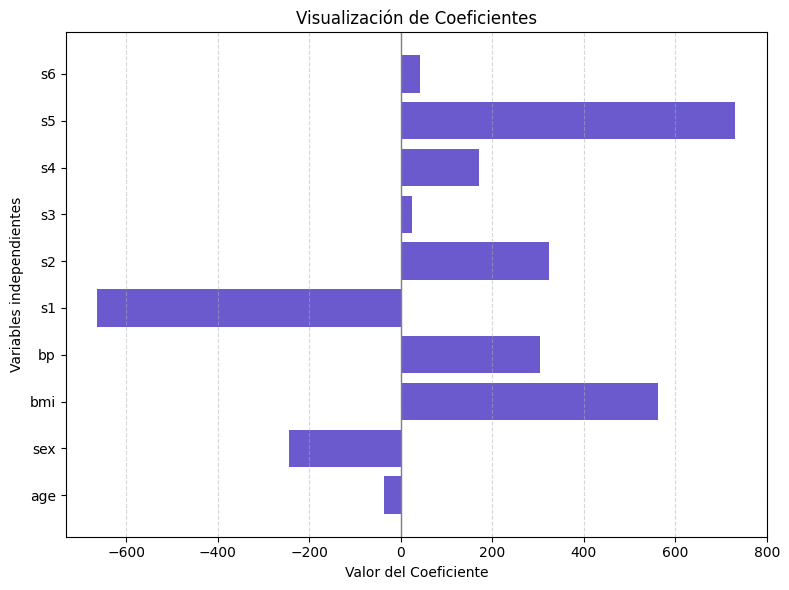

In [44]:
# Obtener coeficientes y nombres de variables
coeficientes = modelo_multi.coef_
variables = X.columns

# Crear gráfico de barras horizontales
plt.figure(figsize=(8, 6))
plt.barh(variables, coeficientes, color='slateblue')
plt.axvline(x=0, color='gray', linewidth=1)

# Títulos y etiquetas
plt.title('Visualización de Coeficientes')
plt.xlabel('Valor del Coeficiente')
plt.ylabel('Variables independientes')

# Mostrar
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()